# Housing Price Prediction Assignment

#### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. Requirement is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know:

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house

## Reading and Understanding data

In [1]:
# importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
prices = pd.read_csv("train.csv")
pd.set_option('display.max_columns',None)
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
prices.shape

(1460, 81)

In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Manipulation

In [6]:
# Checking for missing data
missing_data = pd.DataFrame({'null_column' : prices.columns, 'null_percentage' : prices.isnull().sum()*100/len(prices)})
missing_data = missing_data[missing_data['null_percentage'] > 0]
missing_data

,null_column,null_percentage
LotFrontage,LotFrontage,17.739726
Alley,Alley,93.767123
MasVnrType,MasVnrType,0.547945
MasVnrArea,MasVnrArea,0.547945
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
BsmtExposure,BsmtExposure,2.602740
BsmtFinType1,BsmtFinType1,2.534247
BsmtFinType2,BsmtFinType2,2.602740
Electrical,Electrical,0.068493


Since as per the data dictionary, the value "NA" represents the amenity is not available instead of missing value, replace NA/Nan with NONE for following columns
- Alley
- MasVnrType
- MasVnrArea
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [6]:
prices['Alley'].fillna("NONE", inplace = True)
prices['MasVnrType'].fillna("NONE", inplace = True)
prices['MasVnrArea'].fillna(0, inplace = True)
prices['BsmtQual'].fillna("NONE", inplace = True)
prices['BsmtCond'].fillna("NONE", inplace = True)
prices['BsmtExposure'].fillna("NONE", inplace = True)
prices['BsmtFinType1'].fillna("NONE", inplace = True)
prices['BsmtFinType2'].fillna("NONE", inplace = True)
prices['FireplaceQu'].fillna("NONE", inplace = True)
prices['GarageType'].fillna("NONE", inplace = True)
prices['GarageFinish'].fillna("NONE", inplace = True)
prices['GarageQual'].fillna("NONE", inplace = True)
prices['GarageCond'].fillna("NONE", inplace = True)
prices['PoolQC'].fillna("NONE", inplace = True)
prices['Fence'].fillna("NONE", inplace = True)
prices['MiscFeature'].fillna("NONE", inplace = True)

In [7]:
# Drop row where Electrical column has missing value
prices = prices.dropna(subset=['Electrical'])

# Since it is not clear what Null value of LotFrontage actually represents, dropping the rows with Null value of LotFrontage to avoid ambiguity
prices = prices.dropna(subset=['LotFrontage'])

# Replacing NA/null value in 'GarageYrBlt' to current year so that GarageAge can be properly derived
prices['GarageYrBlt'].fillna(2022, inplace = True)

# Replace year value with number of years so as to properly showcase the age of house
prices['HouseAge'] = prices['YearBuilt'].apply(lambda x: date.today().year - x)
prices['HouseRemodledYrs'] = prices['YearRemodAdd'].apply(lambda x: date.today().year - x)
prices['GarageAge'] = prices['GarageYrBlt'].apply(lambda x: date.today().year - x)

# Drop YearBuilt, YearRemodAdd and GarageYrBlt as these are not required anymore
prices = prices.dropna(subset=['YearBuilt','YearRemodAdd','GarageYrBlt'])

# Checking for missing data
missing_data = pd.DataFrame({'null_column' : prices.columns, 'null_percentage' : prices.isnull().sum()*100/len(prices)})
missing_data = missing_data[missing_data['null_percentage'] > 0]
missing_data

,null_column,null_percentage


# Data Visualization

Visualizing continuous variables

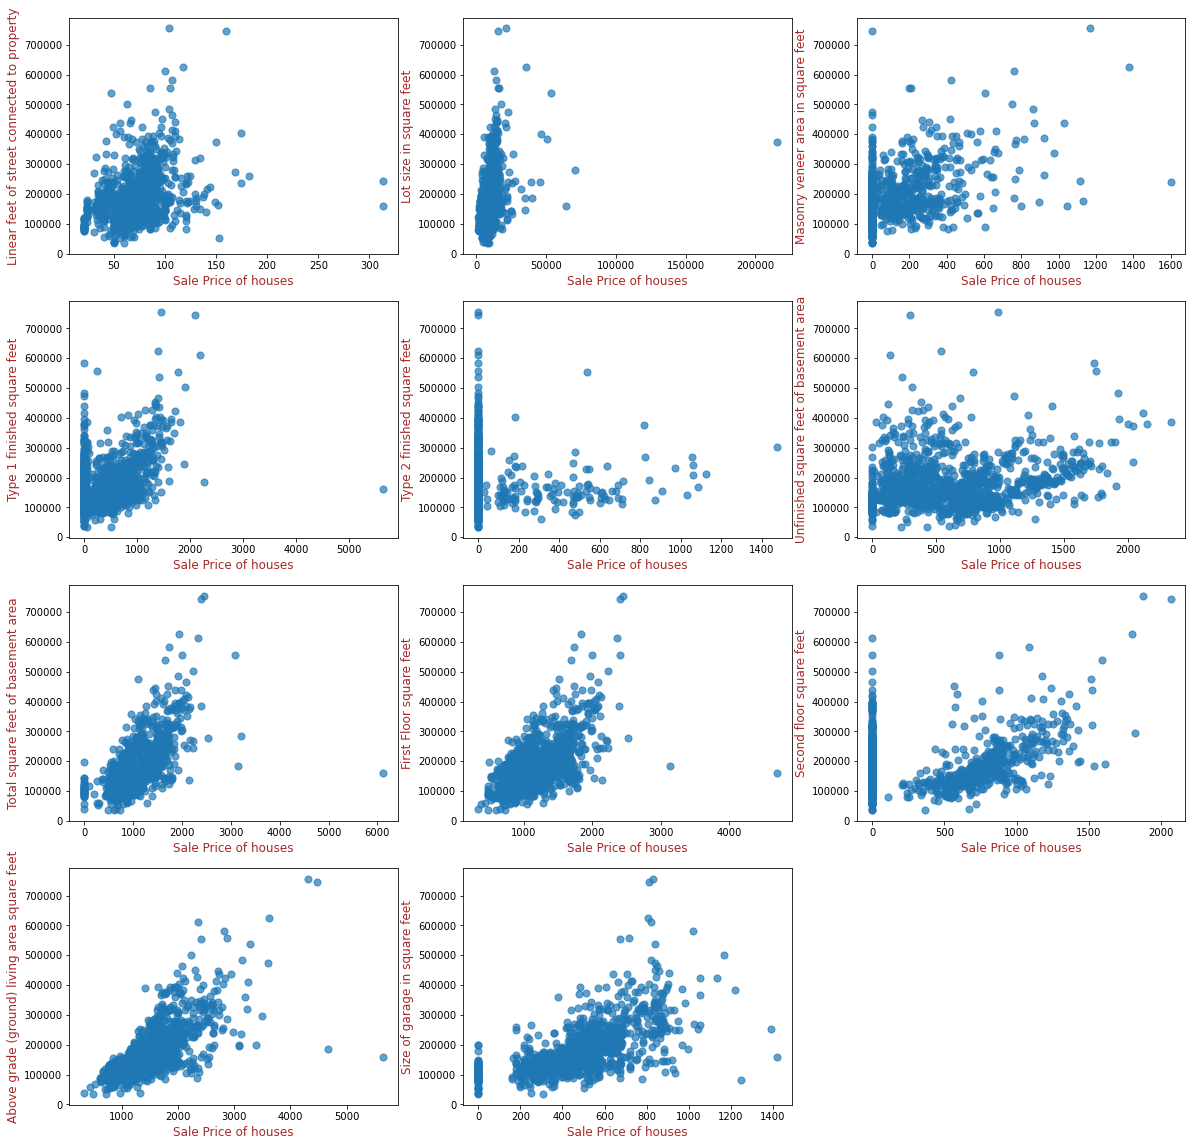

In [8]:
# Scatter plot for LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, 
# GrLivArea and GarageArea

plt.figure(figsize=(20, 20))

plt.subplot(4,3,1)
plt.scatter(prices['LotFrontage'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Linear feet of street connected to property", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,2)
plt.scatter(prices['LotArea'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Lot size in square feet", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,3)
plt.scatter(prices['MasVnrArea'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Masonry veneer area in square feet", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,4)
plt.scatter(prices['BsmtFinSF1'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Type 1 finished square feet", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,5)
plt.scatter(prices['BsmtFinSF2'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Type 2 finished square feet", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,6)
plt.scatter(prices['BsmtUnfSF'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Unfinished square feet of basement area", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,7)
plt.scatter(prices['TotalBsmtSF'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total square feet of basement area", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,8)
plt.scatter(prices['1stFlrSF'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("First Floor square feet", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,9)
plt.scatter(prices['2ndFlrSF'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Second floor square feet", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,10)
plt.scatter(prices['GrLivArea'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Above grade (ground) living area square feet", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(4,3,11)
plt.scatter(prices['GarageArea'], prices['SalePrice'], alpha= 0.7, s = 50)
plt.xlabel("Sale Price of houses", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Size of garage in square feet", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Visualising categorical variables

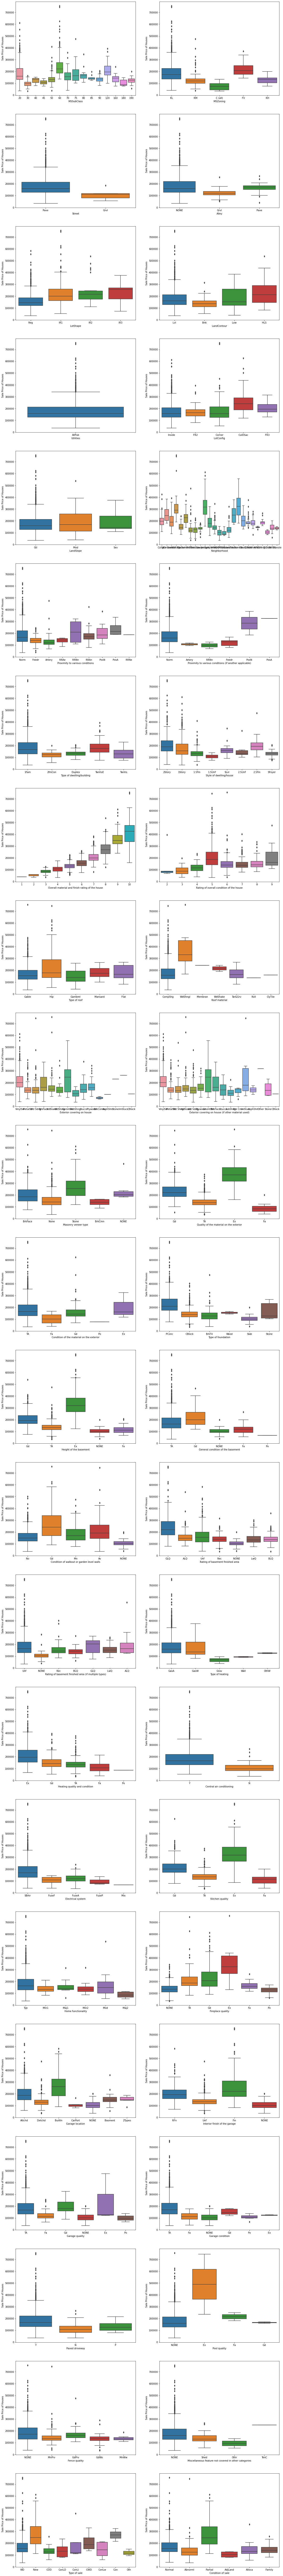

In [9]:
# Box plot for MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, 
# Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, 
# MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC,
# CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, 
# PoolQC, Fence, MiscFeature, SaleType and SaleCondition

plt.figure(figsize=(20, 200))

plt.subplot(23,2,1)
bx1 = sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = prices)
bx1.set(xlabel='MSSubClass', ylabel='Sale Price of Houses')

plt.subplot(23,2,2)
bx2 = sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = prices)
bx2.set(xlabel='MSZoning', ylabel='Sale Price of Houses')

plt.subplot(23,2,3)
bx3 = sns.boxplot(x = 'Street', y = 'SalePrice', data = prices)
bx3.set(xlabel='Street', ylabel='Sale Price of Houses')

plt.subplot(23,2,4)
bx4 = sns.boxplot(x = 'Alley', y = 'SalePrice', data = prices)
bx4.set(xlabel='Alley', ylabel='Sale Price of Houses')

plt.subplot(23,2,5)
bx5 = sns.boxplot(x = 'LotShape', y = 'SalePrice', data = prices)
bx5.set(xlabel='LotShape', ylabel='Sale Price of Houses')

plt.subplot(23,2,6)
bx1 = sns.boxplot(x = 'LandContour', y = 'SalePrice', data = prices)
bx1.set(xlabel='LandContour', ylabel='Sale Price of Houses')

plt.subplot(23,2,7)
bx2 = sns.boxplot(x = 'Utilities', y = 'SalePrice', data = prices)
bx2.set(xlabel='Utilities', ylabel='Sale Price of Houses')

plt.subplot(23,2,8)
bx3 = sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = prices)
bx3.set(xlabel='LotConfig', ylabel='Sale Price of Houses')

plt.subplot(23,2,9)
bx4 = sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = prices)
bx4.set(xlabel='LandSlope', ylabel='Sale Price of Houses')

plt.subplot(23,2,10)
bx5 = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = prices)
bx5.set(xlabel='Neighborhood', ylabel='Sale Price of Houses')

plt.subplot(23,2,11)
bx1 = sns.boxplot(x = 'Condition1', y = 'SalePrice', data = prices)
bx1.set(xlabel='Proximity to various conditions', ylabel='Sale Price of Houses')

plt.subplot(23,2,12)
bx2 = sns.boxplot(x = 'Condition2', y = 'SalePrice', data = prices)
bx2.set(xlabel='Proximity to various conditions (if another applicable)', ylabel='Sale Price of Houses')

plt.subplot(23,2,13)
bx3 = sns.boxplot(x = 'BldgType', y = 'SalePrice', data = prices)
bx3.set(xlabel='Type of dwelling/building', ylabel='Sale Price of Houses')

plt.subplot(23,2,14)
bx4 = sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = prices)
bx4.set(xlabel='Style of dwelling/house', ylabel='Sale Price of Houses')

plt.subplot(23,2,15)
bx5 = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = prices)
bx5.set(xlabel='Overall material and finish rating of the house', ylabel='Sale Price of Houses')

plt.subplot(23,2,16)
bx1 = sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = prices)
bx1.set(xlabel='Rating of overall condition of the house', ylabel='Sale Price of Houses')

plt.subplot(23,2,17)
bx2 = sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = prices)
bx2.set(xlabel='Type of roof', ylabel='Sale Price of Houses')

plt.subplot(23,2,18)
bx3 = sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = prices)
bx3.set(xlabel='Roof material', ylabel='Sale Price of Houses')

plt.subplot(23,2,19)
bx4 = sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = prices)
bx4.set(xlabel='Exterior covering on house', ylabel='Sale Price of Houses')

plt.subplot(23,2,20)
bx5 = sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = prices)
bx5.set(xlabel='Exterior covering on house (if other material used)', ylabel='Sale Price of Houses')

plt.subplot(23,2,21)
bx1 = sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = prices)
bx1.set(xlabel='Masonry veneer type', ylabel='Sale Price of Houses')

plt.subplot(23,2,22)
bx2 = sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = prices)
bx2.set(xlabel='Quality of the material on the exterior', ylabel='Sale Price of Houses')

plt.subplot(23,2,23)
bx3 = sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = prices)
bx3.set(xlabel='Condition of the material on the exterior', ylabel='Sale Price of Houses')

plt.subplot(23,2,24)
bx4 = sns.boxplot(x = 'Foundation', y = 'SalePrice', data = prices)
bx4.set(xlabel='Type of foundation', ylabel='Sale Price of Houses')

plt.subplot(23,2,25)
bx5 = sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = prices)
bx5.set(xlabel='Height of the basement', ylabel='Sale Price of Houses')

plt.subplot(23,2,26)
bx1 = sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = prices)
bx1.set(xlabel='General condition of the basement', ylabel='Sale Price of Houses')

plt.subplot(23,2,27)
bx2 = sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = prices)
bx2.set(xlabel='Condition of walkout or garden level walls', ylabel='Sale Price of Houses')

plt.subplot(23,2,28)
bx3 = sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = prices)
bx3.set(xlabel='Rating of basement finished area', ylabel='Sale Price of Houses')

plt.subplot(23,2,29)
bx4 = sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = prices)
bx4.set(xlabel='Rating of basement finished area (if multiple types)', ylabel='Sale Price of Houses')

plt.subplot(23,2,30)
bx5 = sns.boxplot(x = 'Heating', y = 'SalePrice', data = prices)
bx5.set(xlabel='Type of heating', ylabel='Sale Price of Houses')

plt.subplot(23,2,31)
bx1 = sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = prices)
bx1.set(xlabel='Heating quality and condition', ylabel='Sale Price of Houses')

plt.subplot(23,2,32)
bx2 = sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = prices)
bx2.set(xlabel='Central air conditioning', ylabel='Sale Price of Houses')

plt.subplot(23,2,33)
bx3 = sns.boxplot(x = 'Electrical', y = 'SalePrice', data = prices)
bx3.set(xlabel='Electrical system', ylabel='Sale Price of Houses')

plt.subplot(23,2,34)
bx4 = sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = prices)
bx4.set(xlabel='Kitchen quality', ylabel='Sale Price of Houses')

plt.subplot(23,2,35)
bx5 = sns.boxplot(x = 'Functional', y = 'SalePrice', data = prices)
bx5.set(xlabel='Home functionality', ylabel='Sale Price of Houses')

plt.subplot(23,2,36)
bx1 = sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = prices)
bx1.set(xlabel='Fireplace quality', ylabel='Sale Price of Houses')

plt.subplot(23,2,37)
bx2 = sns.boxplot(x = 'GarageType', y = 'SalePrice', data = prices)
bx2.set(xlabel='Garage location', ylabel='Sale Price of Houses')

plt.subplot(23,2,38)
bx3 = sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = prices)
bx3.set(xlabel='Interior finish of the garage', ylabel='Sale Price of Houses')

plt.subplot(23,2,39)
bx4 = sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = prices)
bx4.set(xlabel='Garage quality', ylabel='Sale Price of Houses')

plt.subplot(23,2,40)
bx5 = sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = prices)
bx5.set(xlabel='Garage condition', ylabel='Sale Price of Houses')

plt.subplot(23,2,41)
bx5 = sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = prices)
bx5.set(xlabel='Paved driveway', ylabel='Sale Price of Houses')

plt.subplot(23,2,42)
bx1 = sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = prices)
bx1.set(xlabel='Pool quality', ylabel='Sale Price of Houses')

plt.subplot(23,2,43)
bx2 = sns.boxplot(x = 'Fence', y = 'SalePrice', data = prices)
bx2.set(xlabel='Fence quality', ylabel='Sale Price of Houses')

plt.subplot(23,2,44)
bx3 = sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = prices)
bx3.set(xlabel='Miscellaneous feature not covered in other categories', ylabel='Sale Price of Houses')

plt.subplot(23,2,45)
bx4 = sns.boxplot(x = 'SaleType', y = 'SalePrice', data = prices)
bx4.set(xlabel='Type of sale', ylabel='Sale Price of Houses')

plt.subplot(23,2,46)
bx5 = sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = prices)
bx5.set(xlabel='Condition of sale', ylabel='Sale Price of Houses')

plt.show()

# Data Preparation
- Dropping unnecessary data
- Creating dummy variables

In [10]:
# Create dummy variables using One-hot encoding for MSSubClass, MSZoning, Street, Alley, LotShape, LandContour,  
# LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle,
# RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure,
# BsmtFinType1, BsmtFinType2, Heating, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageType,
# GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType and SaleCondition

MSSubClass_encod = pd.get_dummies(prices['MSSubClass'], prefix = 'MSSubClass', drop_first = True)
MSZoning_encod = pd.get_dummies(prices['MSZoning'], prefix = 'MSZoning', drop_first = True)
Street_encod = pd.get_dummies(prices['Street'], prefix = 'Street', drop_first = True)
Alley_encod = pd.get_dummies(prices['Alley'], prefix = 'Alley', drop_first = True)
LotShape_encod = pd.get_dummies(prices['LotShape'], prefix = 'LotShape', drop_first = True)

LandContour_encod = pd.get_dummies(prices['LandContour'], prefix = 'LandContour', drop_first = True)
LotConfig_encod = pd.get_dummies(prices['LotConfig'], prefix = 'LotConfig', drop_first = True)
LandSlope_encod = pd.get_dummies(prices['LandSlope'], prefix = 'LandSlope', drop_first = True)
Neighborhood_encod = pd.get_dummies(prices['Neighborhood'], prefix = 'Neighborhood', drop_first = True)
Condition1_encod = pd.get_dummies(prices['Condition1'], prefix = 'Condition1', drop_first = True)

Condition2_encod = pd.get_dummies(prices['Condition2'], prefix = 'Condition2', drop_first = True)
BldgType_encod = pd.get_dummies(prices['BldgType'], prefix = 'BldgType', drop_first = True)
HouseStyle_encod = pd.get_dummies(prices['HouseStyle'], prefix = 'HouseStyle', drop_first = True)
OverallQual_encod = pd.get_dummies(prices['OverallQual'], prefix = 'OverallQual', drop_first = True)
OverallCond_encod = pd.get_dummies(prices['OverallCond'], prefix = 'OverallCond', drop_first = True)

RoofStyle_encod = pd.get_dummies(prices['RoofStyle'], prefix = 'RoofStyle', drop_first = True)
RoofMatl_encod = pd.get_dummies(prices['RoofMatl'], prefix = 'RoofMatl', drop_first = True)
Exterior1st_encod = pd.get_dummies(prices['Exterior1st'], prefix = 'Exterior1st', drop_first = True)
Exterior2nd_encod = pd.get_dummies(prices['Exterior2nd'], prefix = 'Exterior2nd', drop_first = True)
MasVnrType_encod = pd.get_dummies(prices['MasVnrType'], prefix = 'MasVnrType', drop_first = True)

ExterQual_encod = pd.get_dummies(prices['ExterQual'], prefix = 'ExterQual', drop_first = True)
ExterCond_encod = pd.get_dummies(prices['ExterCond'], prefix = 'ExterCond', drop_first = True)
Foundation_encod = pd.get_dummies(prices['Foundation'], prefix = 'Foundation', drop_first = True)
BsmtQual_encod = pd.get_dummies(prices['BsmtQual'], prefix = 'BsmtQual', drop_first = True)
BsmtCond_encod = pd.get_dummies(prices['BsmtCond'], prefix = 'BsmtCond', drop_first = True)

BsmtExposure_encod = pd.get_dummies(prices['BsmtExposure'], prefix = 'BsmtExposure', drop_first = True)
BsmtFinType1_encod = pd.get_dummies(prices['BsmtFinType1'], prefix = 'BsmtFinType1', drop_first = True)
BsmtFinType2_encod = pd.get_dummies(prices['BsmtFinType2'], prefix = 'BsmtFinType2', drop_first = True)
Heating_encod = pd.get_dummies(prices['Heating'], prefix = 'Heating', drop_first = True)
HeatingQC_encod = pd.get_dummies(prices['HeatingQC'], prefix = 'HeatingQC', drop_first = True)

Electrical_encod = pd.get_dummies(prices['Electrical'], prefix = 'Electrical', drop_first = True)
KitchenQual_encod = pd.get_dummies(prices['KitchenQual'], prefix = 'KitchenQual', drop_first = True)
Functional_encod = pd.get_dummies(prices['Functional'], prefix = 'Functional', drop_first = True)
FireplaceQu_encod = pd.get_dummies(prices['FireplaceQu'], prefix = 'FireplaceQu', drop_first = True)
GarageType_encod = pd.get_dummies(prices['GarageType'], prefix = 'GarageType', drop_first = True)

GarageFinish_encod = pd.get_dummies(prices['GarageFinish'], prefix = 'GarageFinish', drop_first = True)
GarageQual_encod = pd.get_dummies(prices['GarageQual'], prefix = 'GarageQual', drop_first = True)
GarageCond_encod = pd.get_dummies(prices['GarageCond'], prefix = 'GarageCond', drop_first = True)
PavedDrive_encod = pd.get_dummies(prices['PavedDrive'], prefix = 'PavedDrive', drop_first = True)
PoolQC_encod = pd.get_dummies(prices['PoolQC'], prefix = 'PoolQC', drop_first = True)

Fence_encod = pd.get_dummies(prices['Fence'], prefix = 'Fence', drop_first = True)
MiscFeature_encod = pd.get_dummies(prices['MiscFeature'], prefix = 'MiscFeature', drop_first = True)
SaleType_encod = pd.get_dummies(prices['SaleType'], prefix = 'SaleType', drop_first = True)
SaleCondition_encod = pd.get_dummies(prices['SaleCondition'], prefix = 'SaleCondition', drop_first = True)

In [11]:
# Add dummy variables to the prices data frame
prices = pd.concat([prices, MSSubClass_encod, MSZoning_encod, Street_encod, Alley_encod, LotShape_encod,
                   LandContour_encod, LotConfig_encod, LandSlope_encod, Neighborhood_encod, Condition1_encod,
                   Condition2_encod, BldgType_encod, HouseStyle_encod, OverallQual_encod, OverallCond_encod,
                   RoofStyle_encod, RoofMatl_encod, Exterior1st_encod, Exterior2nd_encod, MasVnrType_encod,
                   ExterQual_encod, ExterCond_encod, Foundation_encod, BsmtQual_encod, BsmtCond_encod,
                   BsmtExposure_encod, BsmtFinType1_encod, BsmtFinType2_encod, Heating_encod, HeatingQC_encod,
                   Electrical_encod, KitchenQual_encod, Functional_encod, FireplaceQu_encod, GarageType_encod,
                   GarageFinish_encod, GarageQual_encod, GarageCond_encod, PavedDrive_encod, PoolQC_encod,
                   Fence_encod, MiscFeature_encod, SaleType_encod, SaleCondition_encod] , axis=1)

# Drop MSSubClass, MSZoning, Street, Alley, LotShape, LandContour,  
# LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle,
# RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure,
# BsmtFinType1, BsmtFinType2, Heating, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageType,
# GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType and SaleCondition columns 
# as dummy variables have already been added to the data frame

prices.drop(['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
          'Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl',
          'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
          'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional',
          'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
          'SaleType','SaleCondition'], axis = 1, inplace = True)

# Dropping 'Utilities' as all rows have 'AllPub' value, hence it will not have any bearing on house prices
prices.drop(['Utilities'], axis = 1, inplace = True)

# Encoding 'CentralAir'
prices['CentralAir'] = prices['CentralAir'].replace({"Y":1,"N":0}).astype('int')

In [12]:
prices.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,HouseRemodledYrs,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NONE,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NONE,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NONE,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NONE,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NONE,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NONE,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NONE,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NONE,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NONE,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NONE,GarageCo

In [13]:
corr = prices.corr()
corr

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,HouseRemodledYrs,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NONE,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NONE,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NONE,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NONE,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NONE,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NONE,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NONE,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NONE,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NONE,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NONE,GarageCo

# Data Preparation

In [14]:
# Split into X and y
y = prices.pop('SalePrice')
X = prices

# Standardize X 
scaler = MinMaxScaler()

# storing column names in cols, since column names are getting lost after scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = cols

# Splitting into train-test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=100)

In [15]:
# Checking X after standardization
X

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,HouseRemodledYrs,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NONE,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NONE,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NONE,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NONE,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NONE,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NONE,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NONE,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NONE,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NONE,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NONE,GarageCond_Po,Gara

# Model Building and Evaluation

## Ridge Regression

In [16]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# 5 fold cross validation
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 7.0}


In [17]:
#Fitting Ridge model for alpha = 7 
ridge = Ridge(alpha=7)

ridge.fit(X_train, y_train)

# Calculating R2 score, RSS and RMSE for ridge regression model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score(Train)  -  ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score(Test)  -  ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(Train)  -  ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS(Test)  -  ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(Train)  -  ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(Test)  -  ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score(Train)  -   0.8994987993784772
R2 score(Test)  -   0.8776086407617718
RSS(Train)  -   692047367433.0583
RSS(Test)  -   177220672407.4433
MSE(Train)  -   720882674.4094357
MSE(Test)  -   738419468.3643471


## Lasso Regression

In [18]:
# Using the same set of alphas i.e. params for Lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 100}


In [19]:
#Fitting Lasso model for alpha = 100 
lasso = Lasso(alpha=100)
        
lasso.fit(X_train, y_train) 


# Calculating R2 score, RSS and RMSE for Lasso regression model

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score(Train)  -  ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score(Test)  -  ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(Train)  -  ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS(Test)  -  ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(Train)  -  ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(Test)  -  ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 score(Train)  -   0.9136409915722306
R2 score(Test)  -   0.863019366268013
RSS(Train)  -   594664780788.383
RSS(Test)  -   198345701590.98334
MSE(Train)  -   619442479.9878991
MSE(Test)  -   826440423.2957639


In [20]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.994988e-01,9.136410e-01
1,R2 Score (Test),8.776086e-01,8.630194e-01
2,RSS (Train),6.920474e+11,5.946648e+11
3,RSS (Test),1.772207e+11,1.983457e+11
4,MSE (Train),2.684926e+04,2.488860e+04
5,MSE (Test),2.717387e+04,2.874788e+04


## Coefficients in Rigde and Lasso regression models

In [21]:
coeff = pd.DataFrame(index=X.columns)

coeff.rows = X.columns

coeff['Ridge'] = ridge.coef_
coeff['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
coeff

,Ridge,Lasso
Id,-5263.521550,-4217.512642
LotFrontage,459.134227,-0.000000
LotArea,17579.450347,43600.744984
YearBuilt,4289.484534,702.024779
YearRemodAdd,4797.434136,4435.519377
MasVnrArea,20237.339633,15277.028342
BsmtFinSF1,11489.721338,0.000000
BsmtFinSF2,6628.941484,1276.131391
BsmtUnfSF,7648.816654,-0.000000
TotalBsmtSF,15136.936609,0.000000


## Doubling alpha as per subjective questions

## Ridge model with double the alpha

In [22]:
#Fitting Ridge model for alpha = 14 
ridge_double = Ridge(alpha=14)

ridge_double.fit(X_train, y_train)

# Calculating R2 score, RSS and RMSE for new Ridge regression model
y_pred_train = ridge_double.predict(X_train)
y_pred_test = ridge_double.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score(Train)  -  ',r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score(Test)  -  ',r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(Train)  -  ',rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS(Test)  -  ',rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(Train)  -  ',mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(Test)  -  ',mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 score(Train)  -   0.8844562623156931
R2 score(Test)  -   0.879324482936907
RSS(Train)  -   795629693907.1223
RSS(Test)  -   174736161197.54144
MSE(Train)  -   828780931.1532524
MSE(Test)  -   728067338.3230894


## Lasso model with double the alpha

In [23]:
#Fitting Lasso model for alpha = 200 
lasso_double = Lasso(alpha=200)
        
lasso_double.fit(X_train, y_train) 

# Calculating R2 score, RSS and RMSE for new Lasso regression model

y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score(Train)  -  ',r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score(Test)  -  ',r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(Train)  -  ',rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS(Test)  -  ',rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(Train)  -  ',mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(Test)  -  ',mse_test_lr)
metric5.append(mse_test_lr**0.5)

R2 score(Train)  -   0.8927337841094197
R2 score(Test)  -   0.8821669175799028
RSS(Train)  -   738631000052.7971
RSS(Test)  -   170620362649.0064
MSE(Train)  -   769407291.7216637
MSE(Test)  -   710918177.7041934


In [24]:
# Creating a table which contain all the metrics for the new Ridge and Lasso regression models with double the alpha

rg2_metric = pd.Series(metric4 ,name = 'Ridge Regression - double alpha' )
ls2_metric = pd.Series(metric5, name = 'Lasso Regression - double alpha')

final_metric = pd.concat([final_metric, rg2_metric, ls2_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression,Ridge Regression - double alpha,Lasso Regression - double alpha
0,R2 Score (Train),8.994988e-01,9.136410e-01,8.844563e-01,8.927338e-01
1,R2 Score (Test),8.776086e-01,8.630194e-01,8.793245e-01,8.821669e-01
2,RSS (Train),6.920474e+11,5.946648e+11,7.956297e+11,7.386310e+11
3,RSS (Test),1.772207e+11,1.983457e+11,1.747362e+11,1.706204e+11
4,MSE (Train),2.684926e+04,2.488860e+04,2.878856e+04,2.773819e+04
5,MSE (Test),2.717387e+04,2.874788e+04,2.698272e+04,2.666305e+04


In [25]:
coeff['Ridge_double'] = ridge_double.coef_
coeff['Lasso_double'] = lasso_double.coef_

In [26]:
coeff

,Ridge,Lasso,Ridge_double,Lasso_double
Id,-5263.521550,-4217.512642,-5427.538863,-4264.881504
LotFrontage,459.134227,-0.000000,2676.967816,-0.000000
LotArea,17579.450347,43600.744984,11374.510939,0.000000
YearBuilt,4289.484534,702.024779,3378.940606,1745.853219
YearRemodAdd,4797.434136,4435.519377,5869.588788,0.000000
MasVnrArea,20237.339633,15277.028342,17382.161718,5851.231028
BsmtFinSF1,11489.721338,0.000000,9927.870710,0.000000
BsmtFinSF2,6628.941484,1276.131391,5024.240982,0.000000
BsmtUnfSF,7648.816654,-0.000000,8757.754587,0.000000
TotalBsmtSF,15136.936609,0.000000,13731.055353,0.000000
